In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,1.55,11654.0,1330.0,Super Built up area 1330(123.56 sq.m.)Built Up...,2.0,2.0,3,2.0,North-East,New Property,1330.0,1276.0,1180.0,0,0,0,0,0,0,174
1,flat,vatika city,sector 49,3.60,11920.0,3020.0,Carpet area: 3020 (280.57 sq.m.),4.0,5.0,3,7.0,NaN,Moderately Old,NaN,NaN,3020.0,0,1,0,1,0,2,15
2,flat,mm the marina,sector 68,1.00,12500.0,800.0,Carpet area: 800 (74.32 sq.m.),2.0,2.0,3,21.0,NaN,Relatively New,NaN,NaN,800.0,0,0,0,0,0,0,31
3,flat,godrej nature plus,sector 33,1.40,15124.0,926.0,Super Built up area 145Carpet area: 86 sq.m.,3.0,2.0,3+,20.0,NaN,New Property,145.0,NaN,86.0,0,0,0,0,0,0,70
4,flat,ramprastha primera,sector 37d,1.20,13333.0,900.0,Carpet area: 900 (83.61 sq.m.),3.0,3.0,3,5.0,North-East,Relatively New,NaN,NaN,900.0,0,0,1,0,0,0,50


In [5]:
df.shape

(3679, 23)

In [6]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

<Axes: xlabel='price', ylabel='Count'>

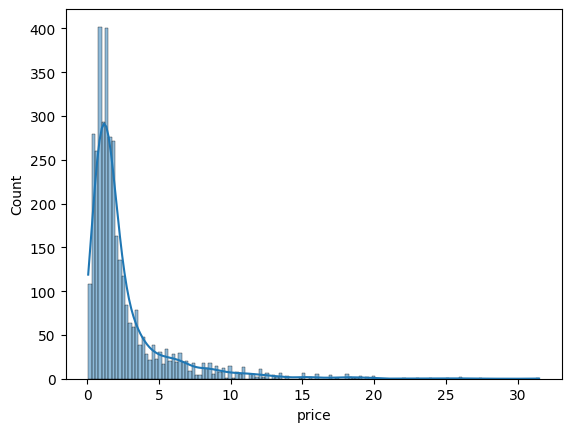

In [7]:
# outliers on the basis of price column
sns.histplot(df['price'], kde=True)

C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='price'>

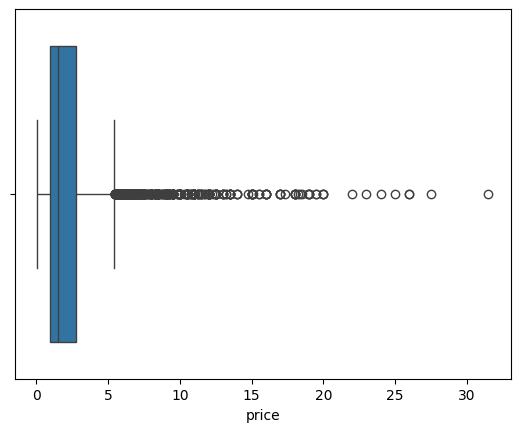

In [8]:
sns.boxplot(x=df['price'])

In [9]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [10]:
outliers.to_excel('outliers_price.xlsx', index=False)

In [11]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3657,house,arjun marg/ sector- phase- / golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7.0,9.0,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74
1598,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
3023,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
3653,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,1,72
68,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4.0,4.0,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
2802,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
1687,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4.0,4.0,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,1,145
3479,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5.0,6.0,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
1140,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16.0,20.0,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,153
1895,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97


### <b> on the basis of price column we can say that there are some genuine outliers but there are some data erros as well

### Price_per_sqft

<Axes: xlabel='price_per_sqft', ylabel='Count'>

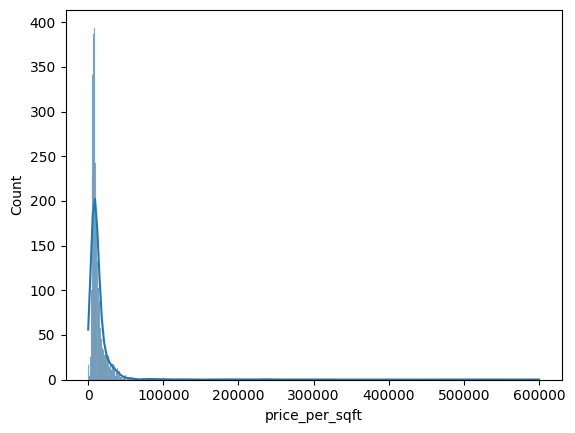

In [12]:
sns.histplot(df['price_per_sqft'], kde=True)

C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='price_per_sqft'>

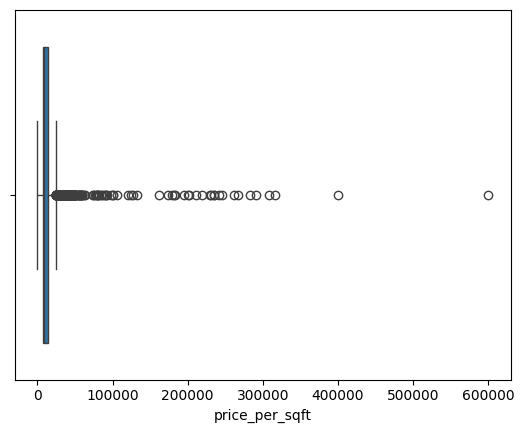

In [13]:
sns.boxplot(x=df['price_per_sqft'])

In [14]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [15]:
outliers_sqft.to_excel('outliers_sqft.xlsx', index=False)

In [16]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\ranja\AppData\Local\Temp\ipykernel_11696\205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [17]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\ranja\AppData\Local\Temp\ipykernel_11696\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [18]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [19]:
df.update(outliers_sqft)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

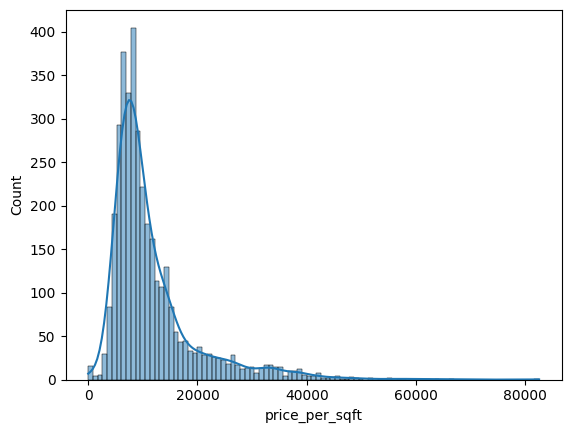

In [20]:
sns.histplot(df['price_per_sqft'], kde=True)

C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='price_per_sqft'>

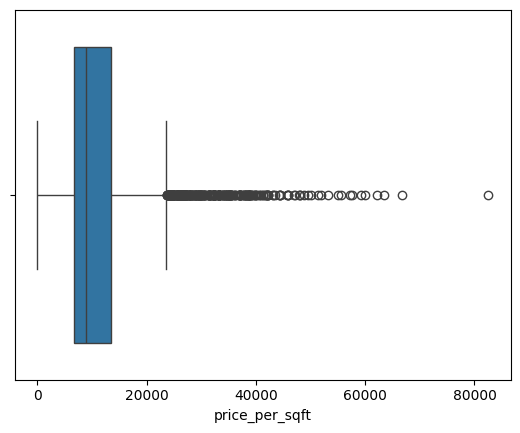

In [21]:
sns.boxplot(x=df['price_per_sqft'])

In [22]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
149,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16.0,16.0,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,1,72
259,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3.0,3.0,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,0,0
451,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16.0,20.0,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,1,0,1,153
795,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2.0,1.0,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,0,0
1326,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16.0,17.0,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,2,137
1590,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4.0,4.0,3,2.0,North,Relatively New,NaN,250.0,200.0,1,1,1,1,0,1,103
2585,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12.0,12.0,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,1,99
2802,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
2952,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4.0,5.0,3+,2.0,North,Old Property,NaN,2250.0,NaN,1,1,0,0,0,1,160
3023,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138


In [23]:
df = df[df['price_per_sqft'] <= 50000]

C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='price_per_sqft'>

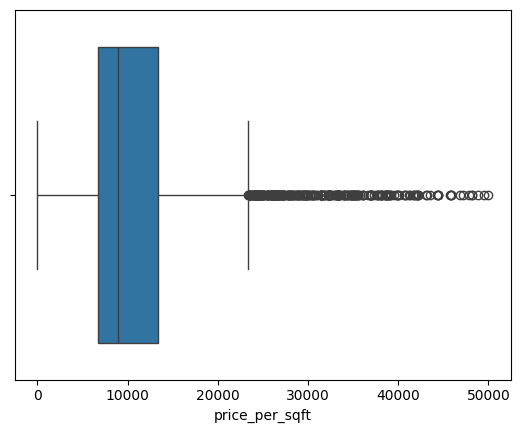

In [24]:
sns.boxplot(x=df['price_per_sqft'])

### Area

<Axes: xlabel='area', ylabel='Count'>

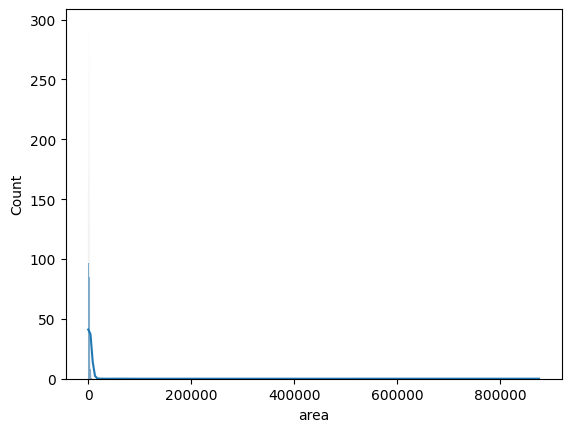

In [25]:
sns.histplot(df['area'], kde=True)

C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='area'>

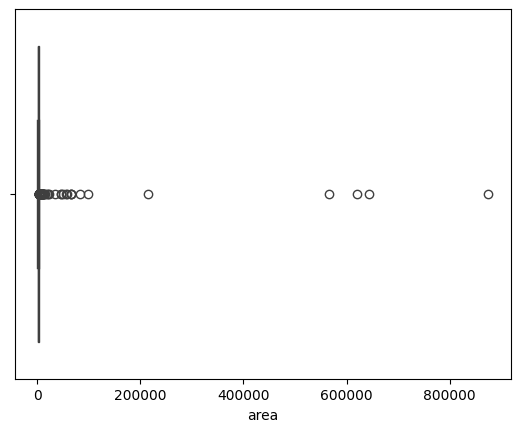

In [26]:
sns.boxplot(x=df['area'])

In [27]:
df['area'].describe()

count      3648.000000
mean       2947.306195
std       23205.025760
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [28]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2329,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44
2390,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,1,0
2984,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,0,65
3334,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76
3546,flat,signature global solera,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44


In [29]:
df = df[df['area'] < 100000]

<Axes: xlabel='area', ylabel='Count'>

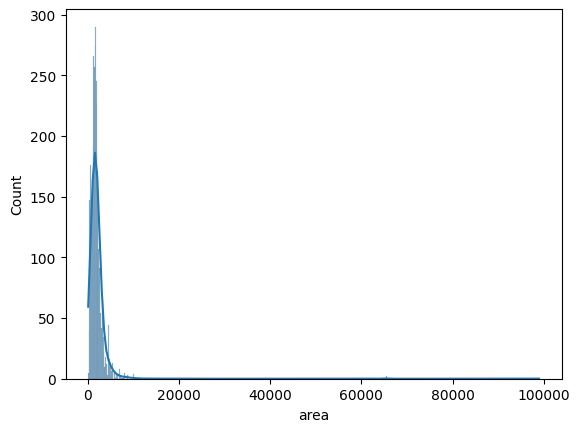

In [30]:
sns.histplot(df['area'], kde=True)  

C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='area'>

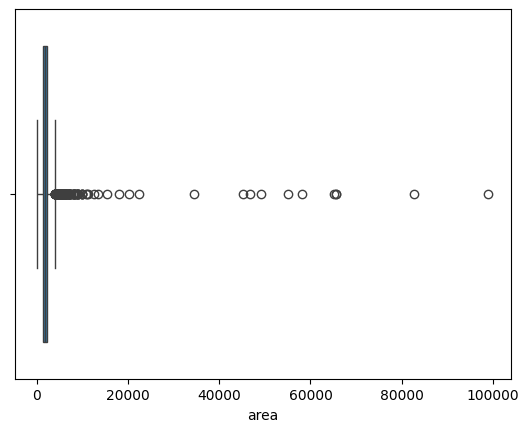

In [31]:
sns.boxplot(x=df['area'])

In [32]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2409,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
3651,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
1344,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
2849,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
2921,house,dlf city plot phase,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
2560,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
567,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
136,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
2955,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
3265,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [33]:
df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [34]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2409,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
3651,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
1344,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
2849,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
2921,house,dlf city plot phase,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
2560,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
567,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
136,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
2955,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
3265,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [35]:
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

<Axes: xlabel='area', ylabel='Count'>

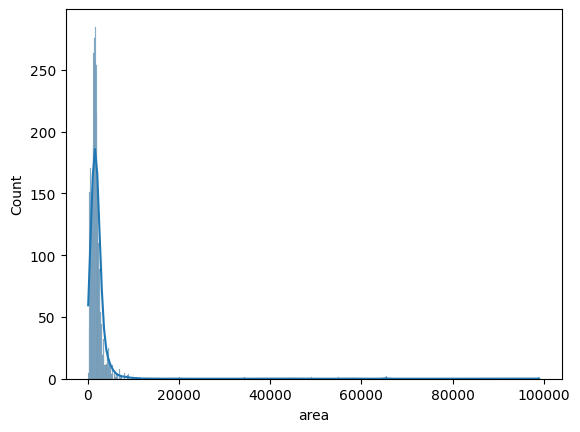

In [36]:
sns.histplot(df['area'], kde=True)

C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='area'>

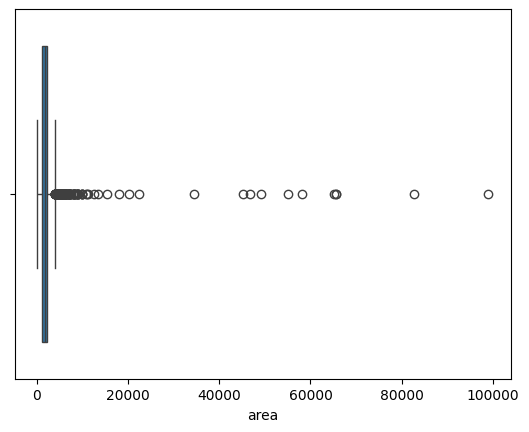

In [37]:
sns.boxplot(x=df['area'])

In [38]:
df['area'].describe()

count     3634.000000
mean      2151.638965
std       3628.397589
min        145.000000
25%       1261.000000
50%       1750.000000
75%       2343.750000
max      98978.000000
Name: area, dtype: float64

### Bedroom

<Axes: xlabel='bedRoom', ylabel='Count'>

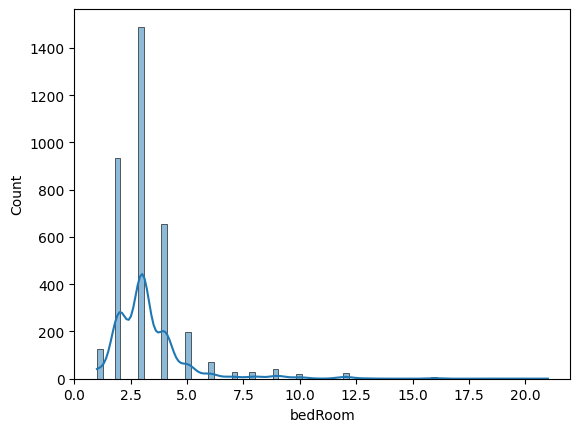

In [39]:
sns.histplot(df['bedRoom'], kde=True)

C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='bedRoom'>

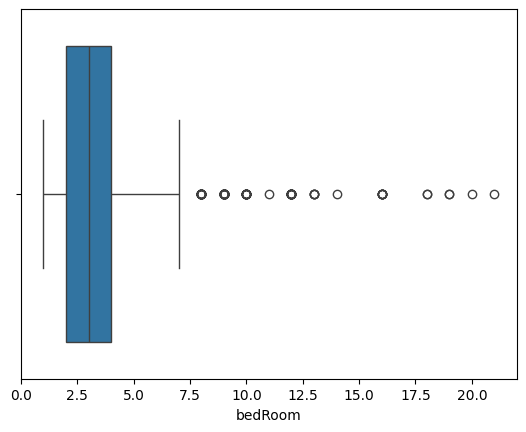

In [40]:
sns.boxplot(x=df['bedRoom'])

In [41]:
df['bedRoom'].describe()

count    3634.000000
mean        3.331040
std         1.830918
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [42]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3473,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,2,49
2485,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,2,22
1985,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,0,74
3217,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,0,68
895,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,2,57
1830,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,2,70
1381,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16.0,16.0,3+,4.0,South,Relatively New,NaN,1800.0,NaN,0,0,0,0,0,1,20
444,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16.0,16.0,3+,4.0,North-West,Relatively New,NaN,2700.0,NaN,1,1,0,1,1,0,41
559,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,2,4.0,West,New Property,NaN,2700.0,NaN,0,1,0,1,0,1,49
831,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,3+,4.0,North-East,New Property,NaN,2700.0,NaN,0,1,0,1,0,1,49


In [43]:
df = df[df['bedRoom'] <= 10]

In [44]:
df.shape

(3589, 23)

<Axes: xlabel='bedRoom', ylabel='Count'>

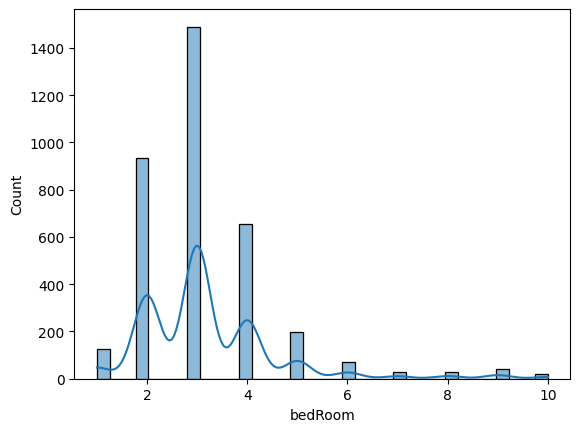

In [45]:
sns.histplot(df['bedRoom'], kde=True)

C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='bedRoom'>

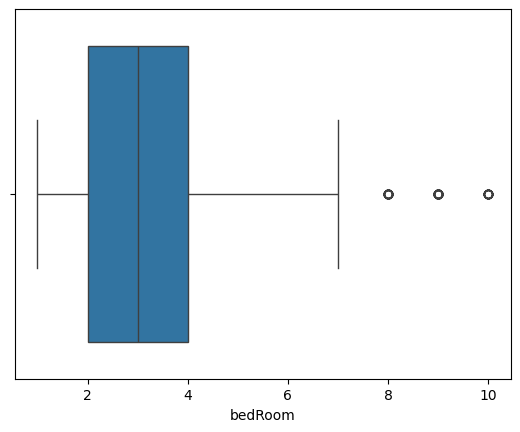

In [46]:
sns.boxplot(x=df['bedRoom'])

In [47]:
df['bedRoom'].describe()

count    3589.000000
mean        3.201170
std         1.395042
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

<Axes: xlabel='bathroom', ylabel='Count'>

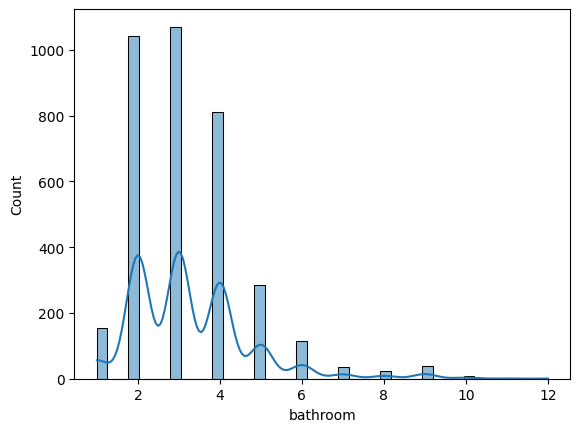

In [48]:
sns.histplot(df['bathroom'], kde=True)

C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='bathroom'>

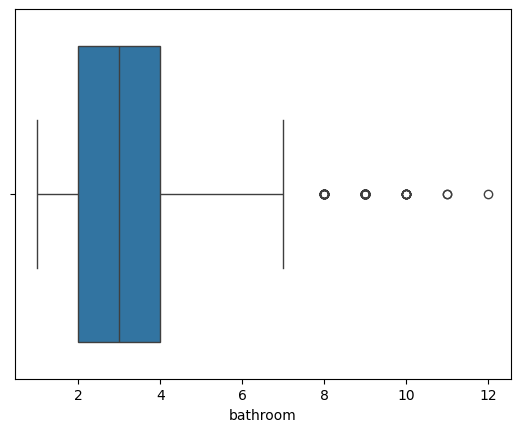

In [49]:
sns.boxplot(x=df['bathroom'])

In [50]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1783,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,1,146
2203,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,1,38
3784,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,1,39


In [51]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,1.55,11654.0,1330.0,Super Built up area 1330(123.56 sq.m.)Built Up...,2.0,2.0,3,2.0,North-East,New Property,1330.0,1276.0,1180.0,0,0,0,0,0,0,174
1,flat,vatika city,sector 49,3.60,11920.0,3020.0,Carpet area: 3020 (280.57 sq.m.),4.0,5.0,3,7.0,NaN,Moderately Old,NaN,NaN,3020.0,0,1,0,1,0,2,15
3,flat,godrej nature plus,sector 33,1.40,15124.0,926.0,Super Built up area 145Carpet area: 86 sq.m.,3.0,2.0,3+,20.0,NaN,New Property,145.0,NaN,86.0,0,0,0,0,0,0,70
4,flat,ramprastha primera,sector 37d,1.20,13333.0,900.0,Carpet area: 900 (83.61 sq.m.),3.0,3.0,3,5.0,North-East,Relatively New,NaN,NaN,900.0,0,0,1,0,0,0,50
5,flat,microtek greenburg,sector 86,1.25,8445.0,1480.0,Super Built up area 1480(137.5 sq.m.),2.0,2.0,3,13.0,West,Moderately Old,1480.0,NaN,NaN,1,0,0,0,0,0,6


### super built up area

<Axes: xlabel='super_built_up_area', ylabel='Count'>

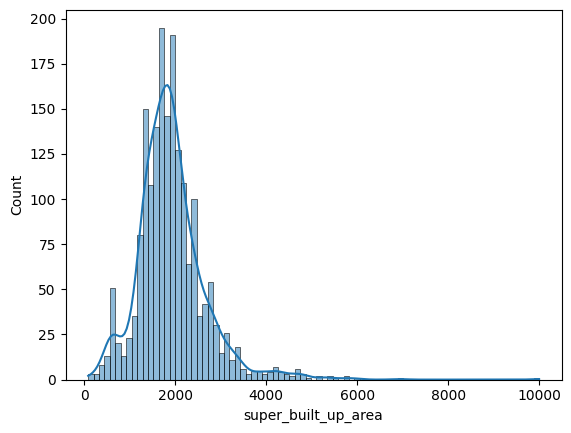

In [52]:
sns.histplot(df['super_built_up_area'], kde=True)

C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='super_built_up_area'>

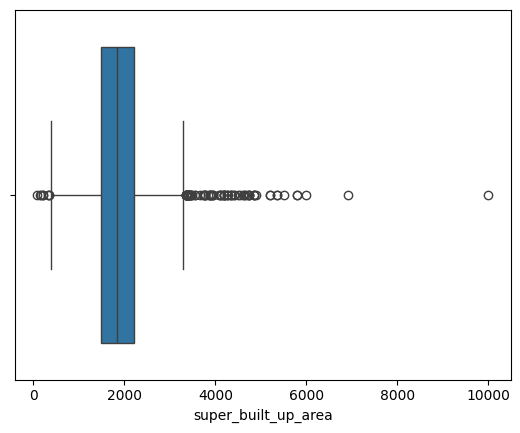

In [53]:
sns.boxplot(x=df['super_built_up_area'])

In [54]:
df['super_built_up_area'].describe()

count     1872.000000
mean      1924.282879
std        763.994461
min         89.000000
25%       1478.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [55]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
591,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,1,140
1055,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,0,49


### built up area

<Axes: xlabel='built_up_area', ylabel='Count'>

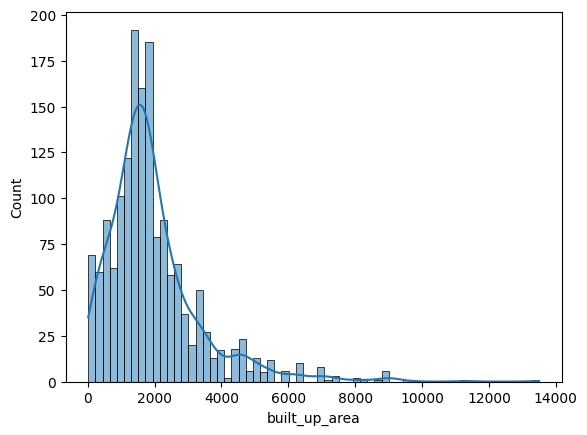

In [56]:
sns.histplot(df['built_up_area'], kde=True)

C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='built_up_area'>

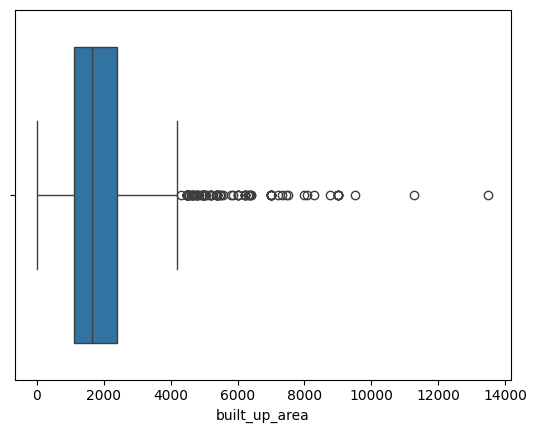

In [57]:
sns.boxplot(x=df['built_up_area'])

In [58]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1598,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
2093,house,independent,sector 4,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3.0,3.0,1,1.0,North,Relatively New,NaN,13500.0,NaN,0,0,0,0,1,0,0


### carpet area

<Axes: xlabel='carpet_area', ylabel='Count'>

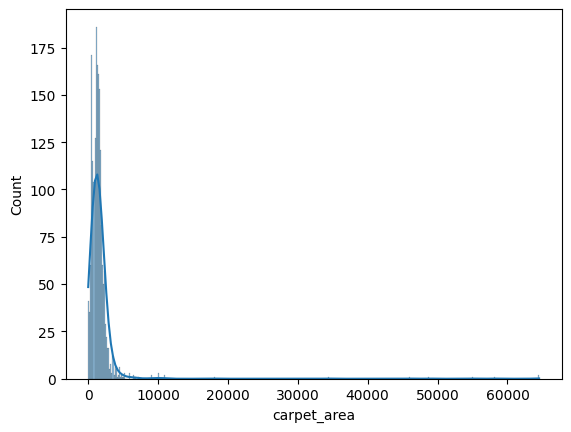

In [59]:
sns.histplot(df['carpet_area'], kde=True)

C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='carpet_area'>

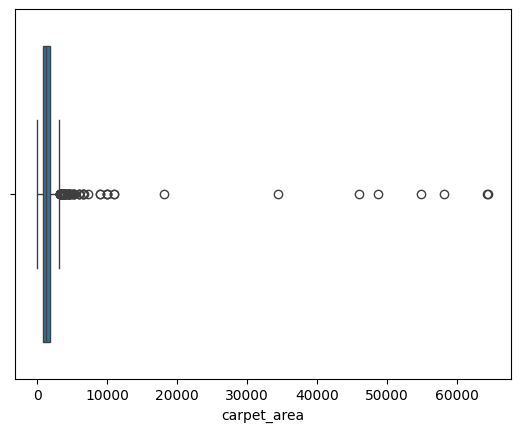

In [60]:
sns.boxplot(x=df['carpet_area'])

In [61]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
136,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1,0,0,0,0,0,37
567,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0,0,0,0,0,0,37
1344,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.0,0,0,0,0,0,0,51
1997,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,1,44
2053,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1.0,1.0,1,13.0,North,Relatively New,NaN,NaN,34401.0,0,0,0,0,0,0,68
2409,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,1,60
2560,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
2849,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.0,1,0,0,0,0,0,15
3265,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0,0,0,0,1,0,33
3755,flat,mm golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [62]:
df.loc[2131,'carpet_area'] = 1812

In [63]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
136,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1,0,0,0,0,0,37
567,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0,0,0,0,0,0,37
1344,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.0,0,0,0,0,0,0,51
1997,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,1,44
2053,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1.0,1.0,1,13.0,North,Relatively New,NaN,NaN,34401.0,0,0,0,0,0,0,68
2409,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,1,60
2560,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
2849,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.0,1,0,0,0,0,0,15
3265,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0,0,0,0,1,0,33
3755,flat,mm golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [64]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,1.55,11654.0,1330.0,Super Built up area 1330(123.56 sq.m.)Built Up...,2.0,2.0,3,2.0,North-East,New Property,1330.0,1276.0,1180.0,0,0,0,0,0,0,174
1,flat,vatika city,sector 49,3.60,11920.0,3020.0,Carpet area: 3020 (280.57 sq.m.),4.0,5.0,3,7.0,NaN,Moderately Old,NaN,NaN,3020.0,0,1,0,1,0,2,15
3,flat,godrej nature plus,sector 33,1.40,15124.0,926.0,Super Built up area 145Carpet area: 86 sq.m.,3.0,2.0,3+,20.0,NaN,New Property,145.0,NaN,86.0,0,0,0,0,0,0,70
4,flat,ramprastha primera,sector 37d,1.20,13333.0,900.0,Carpet area: 900 (83.61 sq.m.),3.0,3.0,3,5.0,North-East,Relatively New,NaN,NaN,900.0,0,0,1,0,0,0,50
5,flat,microtek greenburg,sector 86,1.25,8445.0,1480.0,Super Built up area 1480(137.5 sq.m.),2.0,2.0,3,13.0,West,Moderately Old,1480.0,NaN,NaN,1,0,0,0,0,0,6


<Axes: xlabel='luxury_score', ylabel='Count'>

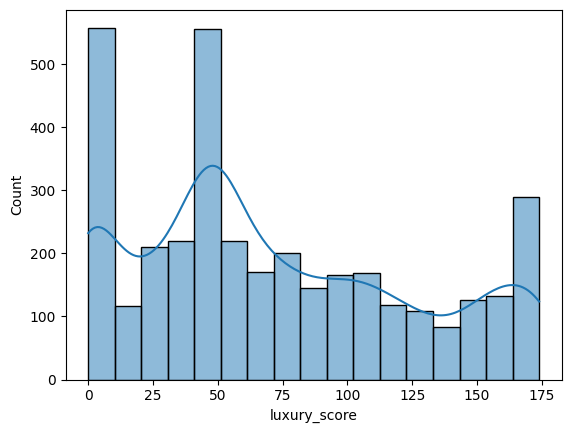

In [65]:
sns.histplot(df['luxury_score'], kde=True)

C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='luxury_score'>

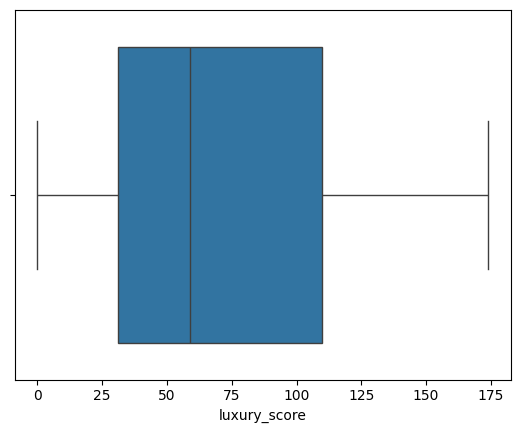

In [66]:
sns.boxplot(df['luxury_score'], orient='h')

In [67]:
df.shape

(3589, 23)

In [68]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [69]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,1.55,11654.0,1330.0,Super Built up area 1330(123.56 sq.m.)Built Up...,2.0,2.0,3,2.0,North-East,New Property,1330.0,1276.0,1180.0,0,0,0,0,0,0,174
1,flat,vatika city,sector 49,3.60,11921.0,3020.0,Carpet area: 3020 (280.57 sq.m.),4.0,5.0,3,7.0,NaN,Moderately Old,NaN,NaN,3020.0,0,1,0,1,0,2,15
3,flat,godrej nature plus,sector 33,1.40,15119.0,926.0,Super Built up area 145Carpet area: 86 sq.m.,3.0,2.0,3+,20.0,NaN,New Property,145.0,NaN,86.0,0,0,0,0,0,0,70
4,flat,ramprastha primera,sector 37d,1.20,13333.0,900.0,Carpet area: 900 (83.61 sq.m.),3.0,3.0,3,5.0,North-East,Relatively New,NaN,NaN,900.0,0,0,1,0,0,0,50
5,flat,microtek greenburg,sector 86,1.25,8446.0,1480.0,Super Built up area 1480(137.5 sq.m.),2.0,2.0,3,13.0,West,Moderately Old,1480.0,NaN,NaN,1,0,0,0,0,0,6


<Axes: xlabel='price_per_sqft', ylabel='Count'>

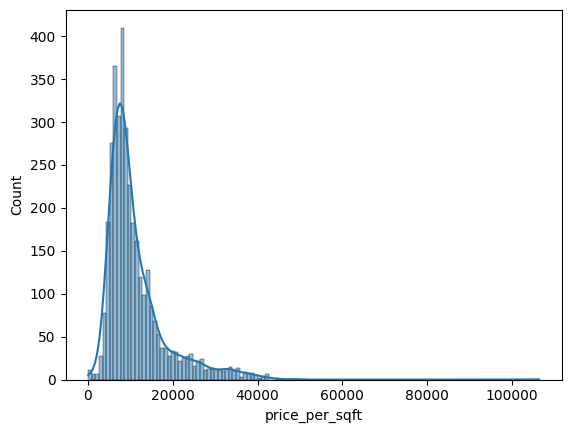

In [70]:
sns.histplot(df['price_per_sqft'], kde=True)

C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='price_per_sqft'>

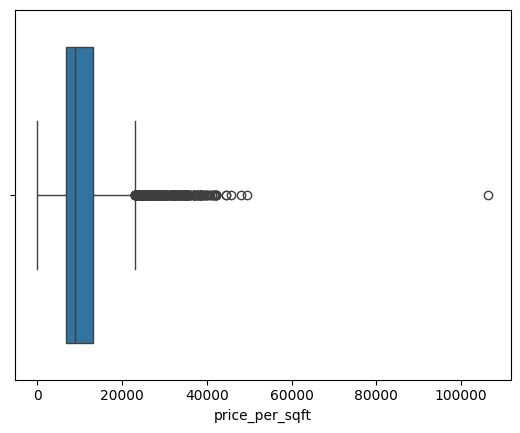

In [71]:
sns.boxplot(df['price_per_sqft'], orient='h')

In [72]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
303,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,1,60
1305,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,0,0
1895,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97
2061,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,1,121
2702,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,1,88
2900,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,2,0
3067,house,sushant lok builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,1,7
3226,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,1,44
3444,house,ss hibiscus,sector 50,12.5,106383.0,1175.0,Plot area 470(392.98 sq.m.)Built Up area: 410 ...,4.0,4.0,3+,2.0,West,Relatively New,NaN,410.0,340.0,1,1,0,0,0,2,160
3713,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,1,103


In [73]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

186.12

In [74]:
df[(df['area']/df['bedRoom'])<183]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
52,house,independent,sector 38,2.10,23333.0,900.0,Plot area 100(83.61 sq.m.),7.0,7.0,3+,3.0,North-East,Relatively New,NaN,900.0,NaN,1,0,1,1,0,0,27
163,house,independent,sector 6,0.50,13889.0,360.0,Plot area 40(33.45 sq.m.),5.0,3.0,3,3.0,NaN,Old Property,NaN,360.0,NaN,0,0,0,0,0,0,0
167,house,sheetla enclave,sector 5,0.96,10000.0,960.0,Plot area 945(87.79 sq.m.),7.0,4.0,2,3.0,NaN,Moderately Old,NaN,945.0,NaN,0,0,1,1,0,1,0
367,house,sai kripa floors,sector 11,0.90,11250.0,800.0,Plot area 800(74.32 sq.m.),5.0,5.0,3,3.0,NaN,Relatively New,NaN,800.0,NaN,0,0,0,0,0,0,0
396,house,not applicable,sector 4,0.75,11719.0,640.0,Plot area 640(59.46 sq.m.),5.0,4.0,3,2.0,NaN,Moderately Old,NaN,640.0,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,house,palam vihar extension west zone rwa,sector 2,0.40,4444.0,900.0,Plot area 900(83.61 sq.m.),6.0,4.0,2,2.0,West,Moderately Old,NaN,900.0,NaN,0,0,0,0,0,0,36
3318,house,independent,sector 47,0.99,17188.0,576.0,Plot area 64(53.51 sq.m.),4.0,4.0,3,4.0,NaN,Relatively New,NaN,576.0,NaN,0,0,0,0,0,0,13
3405,house,independent,sector 17,0.32,22069.0,145.0,Built Up area: 145 (13.47 sq.m.),2.0,2.0,0,3.0,NaN,Undefined,NaN,145.0,NaN,0,0,0,0,0,0,0
3578,house,independent,sector 55,1.45,26852.0,540.0,Plot area 60(5.57 sq.m.),4.0,4.0,3+,4.0,East,Relatively New,NaN,60.0,NaN,0,0,1,0,0,0,70


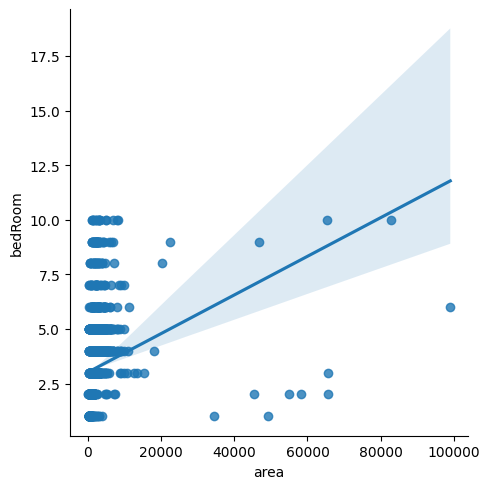

In [75]:
sns.lmplot(x='area', y='bedRoom', data=df)

In [76]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [77]:
(df[df['area_room_ratio']<250])['bedRoom'].value_counts()

bedRoom
2.0     47
3.0     33
5.0     28
6.0     17
4.0     17
9.0     15
8.0     12
7.0      8
10.0     7
Name: count, dtype: int64

In [78]:
df = df[df['area_room_ratio']>100]

In [79]:
outliers_df = df[(df['area_room_ratio']<250) & (df['bedRoom']>3)]

In [80]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])

C:\Users\ranja\AppData\Local\Temp\ipykernel_11696\3450078040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [81]:
df.update(outliers_df)

In [82]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [83]:
df[(df['area_room_ratio']<250) & (df['bedRoom']>4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
287,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5.0,4.0,2,1.0,East,Undefined,NaN,1100.0,900.0,0,0,0,0,0,0,0,220.000000
649,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9.0,4.0,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0,120.000000
1302,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9.0,5.0,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,0,8,200.000000
1372,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10.0,7.0,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,1,0,225.000000
1620,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5.0,3.0,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,180.000000
1685,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5.0,1.0,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,0,0,113.000000
1845,house,"bhim nagar, sector",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5.0,2.0,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,0,1,0,0,29,120.600000
2055,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10.0,1.0,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,0,0,225.000000
2147,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8.0,8.0,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0,0,0,0,0,0,0,150.000000
2286,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6.0,4.0,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,150.000000


In [84]:
df[(df['area_room_ratio']<250) & (df['bedRoom']>4)].shape

(13, 24)

In [85]:
df.shape

(3569, 24)

In [86]:
df = df[~((df['area_room_ratio']<250) & (df['bedRoom']>4))]

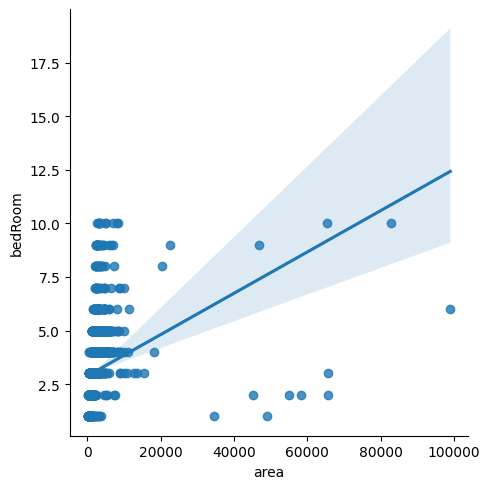

In [87]:
sns.lmplot(x='area', y='bedRoom', data=df)

In [89]:
df.to_csv('gurgaon_properties_outlier_treated.csv', index=False)